### Regra de Simpson 1/3 Composta ###
Digite a função em termos de x: 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
Digite o limite inferior de integração (a): 0
Digite o limite superior de integração (b): 0.8
Digite o número de subintervalos (deve ser par): 10

Tabela de valores:
 x_i   f(x_i)  Coef. Simpson
0.00 0.200000              1
0.08 1.230047              4
0.16 1.296919              2
0.24 1.343721              4
0.32 1.743393              2
0.40 2.456000              4
0.48 3.186015              2
0.56 3.539607              4
0.64 3.181929              2
0.72 1.994401              4
0.80 0.232000              1

A integral numérica de f(x) no intervalo [0.0, 0.8] com 10 subintervalos é aproximadamente: 1.6400964266666769
A integral analítica de f(x) no intervalo [0.0, 0.8] é: 1.64053333333333
O erro absoluto entre o valor analítico e o estimado é: 0.0004369066666534138


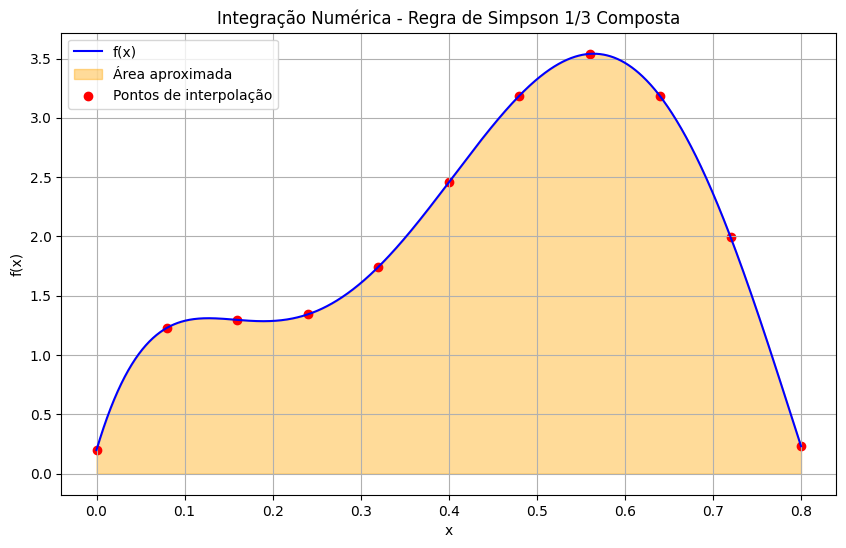

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

def simpson_1_3_composta(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("O número de subintervalos (n) deve ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    fx = f(x)

    coeficientes = np.array([1] + [4 if i % 2 != 0 else 2 for i in range(1, n)] + [1])
    integral = (h / 3) * np.sum(coeficientes * fx)

    # Retorna tudo o que precisamos para a tabela e o gráfico
    return integral, x, fx, coeficientes

# Entrada do usuário
print("### Regra de Simpson 1/3 Composta ###")
funcao = input("Digite a função em termos de x: ")
a = float(input("Digite o limite inferior de integração (a): "))
b = float(input("Digite o limite superior de integração (b): "))
n = int(input("Digite o número de subintervalos (deve ser par): "))

if n % 2 != 0:
    print("Erro: O número de subintervalos deve ser par.")
else:
    f = lambda x: eval(funcao)
    resultado, x_vals, fx_vals, coef = simpson_1_3_composta(f, a, b, n)

    # Tabela de valores
    tabela = pd.DataFrame({
        'x_i': x_vals,
        'f(x_i)': fx_vals,
        'Coef. Simpson': coef
    })
    print("\nTabela de valores:")
    print(tabela.to_string(index=False))

    # Integral analítica
    x = sp.Symbol('x')
    funcao_simb = sp.sympify(funcao)
    integral_analitica = sp.integrate(funcao_simb, (x, a, b))
    integral_analitica_valor = float(integral_analitica)
    erro = abs(integral_analitica_valor - resultado)

    # Resultados
    print(f"\nA integral numérica de f(x) no intervalo [{a}, {b}] com {n} subintervalos é aproximadamente: {resultado}")
    print(f"A integral analítica de f(x) no intervalo [{a}, {b}] é: {integral_analitica}")
    print(f"O erro absoluto entre o valor analítico e o estimado é: {erro}")

    # Gráfico
    x_graf = np.linspace(a, b, 1000)
    y_graf = f(x_graf)

    plt.figure(figsize=(10, 6))
    plt.plot(x_graf, y_graf, label='f(x)', color='blue')
    plt.fill_between(x_graf, y_graf, where=[(xi >= a) and (xi <= b) for xi in x_graf], color='orange', alpha=0.4, label='Área aproximada')

    plt.scatter(x_vals, fx_vals, color='red', label='Pontos de interpolação')
    plt.title("Integração Numérica - Regra de Simpson 1/3 Composta")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()
